<a href="https://colab.research.google.com/github/davidlealo/sic_ai_2025_sept/blob/main/3_machine_learning/clase_18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Grupos

'''

GRUPO 1: Kmeans (44 a 54)

GRUPO 2: Otros métodos (55 a 67)

GRUPO 3: PCA (68 a 86)

GRUPO 4: Aplicación de PCA (87 a 99)


'''

In [ ]:
# Kmeans - Kmodes - Kprototypes

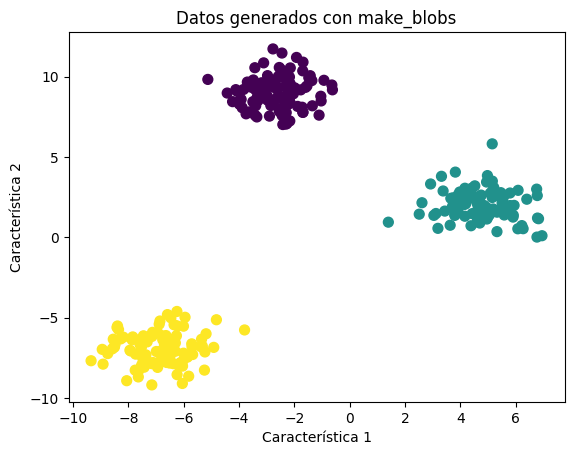

In [21]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generar datos sintéticos con 3 centros (clusters)
X, y = make_blobs(n_samples=300, centers=3, random_state=42)

# Visualizar los datos generados
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')
plt.title("Datos generados con make_blobs")
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")
plt.show()

In [22]:
X

array([[-7.33898809, -7.72995396],
       [-7.74004056, -7.26466514],
       [-1.68665271,  7.79344248],
       [ 4.42219763,  3.07194654],
       [-8.91775173, -7.8881959 ],
       [ 5.49753846,  1.81323115],
       [-2.3360167 ,  9.39960351],
       [ 5.05281029,  1.40944513],
       [-2.98837186,  8.82862715],
       [-3.70050112,  9.67083974],
       [-3.11090424, 10.86656431],
       [ 4.99689432,  1.28026009],
       [-2.30033403,  7.054616  ],
       [-3.92456837,  8.59364081],
       [-7.53026976, -7.36723498],
       [-3.21125072,  8.68662398],
       [-8.50716963, -6.83202465],
       [ 2.61473625,  2.159624  ],
       [-2.41212007,  9.98293112],
       [-1.92234053, 11.20474175],
       [-1.35060204,  8.19360381],
       [-2.67048333,  9.41833699],
       [ 5.61499857,  1.8261123 ],
       [-6.99195524, -7.10107919],
       [-2.97261532,  8.54855637],
       [-6.34982301, -5.43854097],
       [-7.45639852, -6.12471837],
       [ 3.82165815,  4.06555696],
       [ 4.62763206,

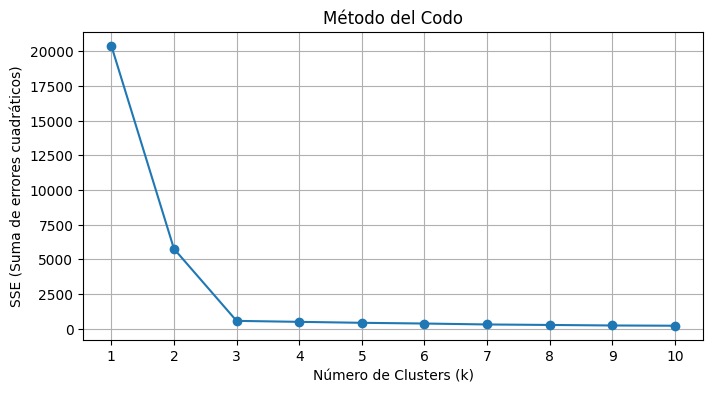

Coeficiente de Silueta para k=2: 0.7049437310743717
Coeficiente de Silueta para k=3: 0.8480303059596955
Coeficiente de Silueta para k=4: 0.6636976714243523
Coeficiente de Silueta para k=5: 0.49012744554094295
Coeficiente de Silueta para k=6: 0.5168058221331912
Coeficiente de Silueta para k=7: 0.358030586983425
Coeficiente de Silueta para k=8: 0.3625632360122803
Coeficiente de Silueta para k=9: 0.37134027555333055
Coeficiente de Silueta para k=10: 0.36060815308421224


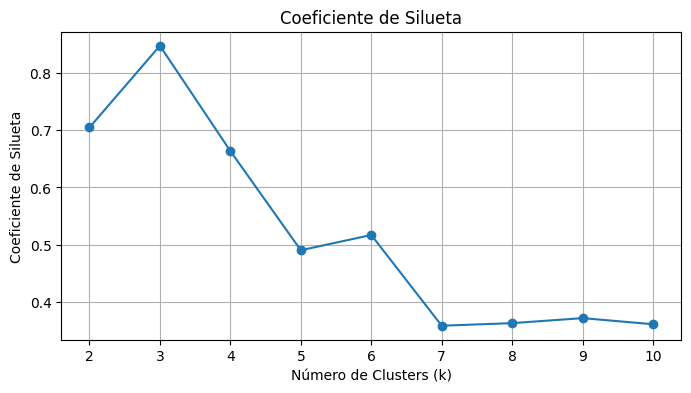

In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Método del Codo (Elbow Method)
sse = []
k_range = range(1, 11) # Probaremos de 1 a 10 clusters
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # Added n_init
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(k_range, sse, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('SSE (Suma de errores cuadráticos)')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# Coeficiente de Silueta (Silhouette Score)
# No tiene sentido calcular el coeficiente de silueta para k=1
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # Added n_init
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)
    print(f'Coeficiente de Silueta para k={k}: {score}')

plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Coeficiente de Silueta')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Coeficiente de Silueta')
plt.xticks(range(2, 11))
plt.grid(True)
plt.show()

In [3]:
%%capture
!pip install estyp


In [5]:
from estyp.cluster import NClusterSearch


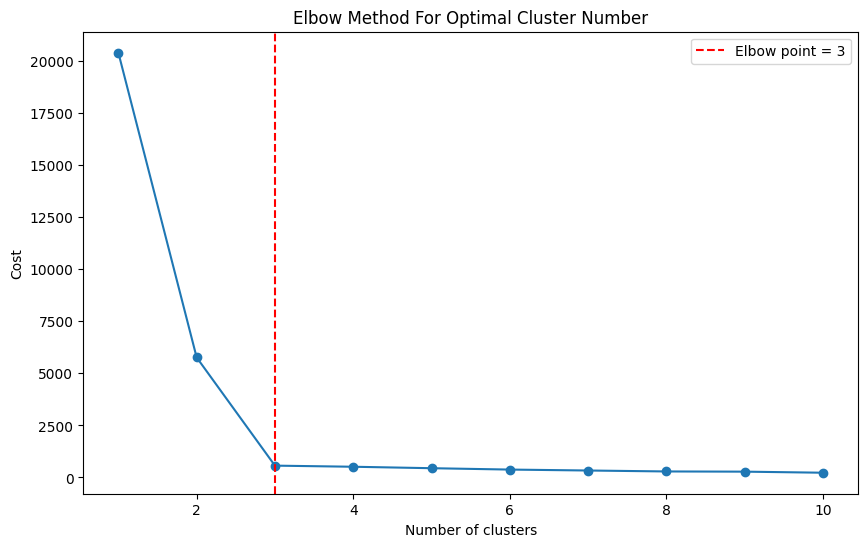

In [6]:
searcher = NClusterSearch(estimator=KMeans(), method='elbow')
searcher.fit(X)

labels = searcher.labels_
predicted_labels = searcher.predict(X)
optimal_model = searcher.best_estimator_
optimal_clusters = searcher.optimal_clusters_

searcher.plot()

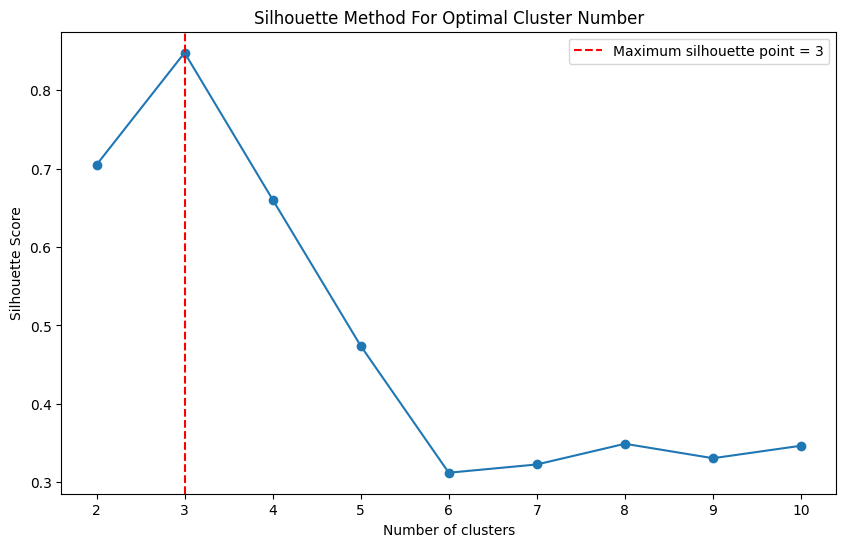

In [8]:
searcher = NClusterSearch(estimator=KMeans(), method='silhouette')
searcher.fit(X)

labels = searcher.labels_
predicted_labels = searcher.predict(X)
optimal_model = searcher.best_estimator_
optimal_clusters = searcher.optimal_clusters_

searcher.plot()

In [9]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

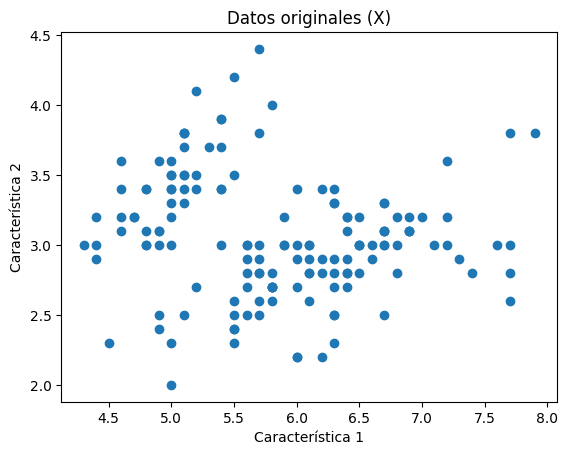

In [14]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1])
plt.title("Datos originales (X)")
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")
plt.show()

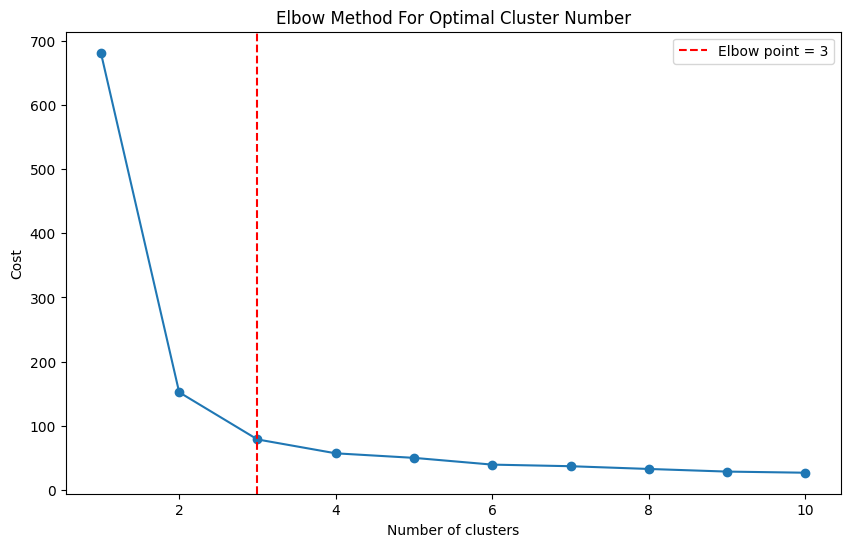

In [10]:
searcher = NClusterSearch(estimator=KMeans(), method='elbow')
searcher.fit(X)

labels = searcher.labels_
predicted_labels = searcher.predict(X)
optimal_model = searcher.best_estimator_
optimal_clusters = searcher.optimal_clusters_

searcher.plot()

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

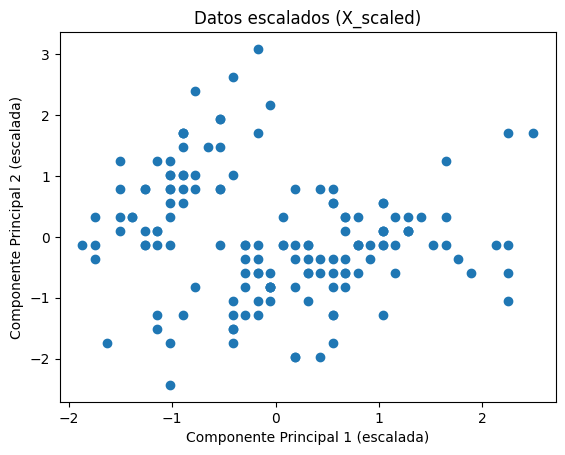

In [13]:
import matplotlib.pyplot as plt

plt.scatter(X_scaled[:, 0], X_scaled[:, 1])
plt.title("Datos escalados (X_scaled)")
plt.xlabel("Componente Principal 1 (escalada)")
plt.ylabel("Componente Principal 2 (escalada)")
plt.show()

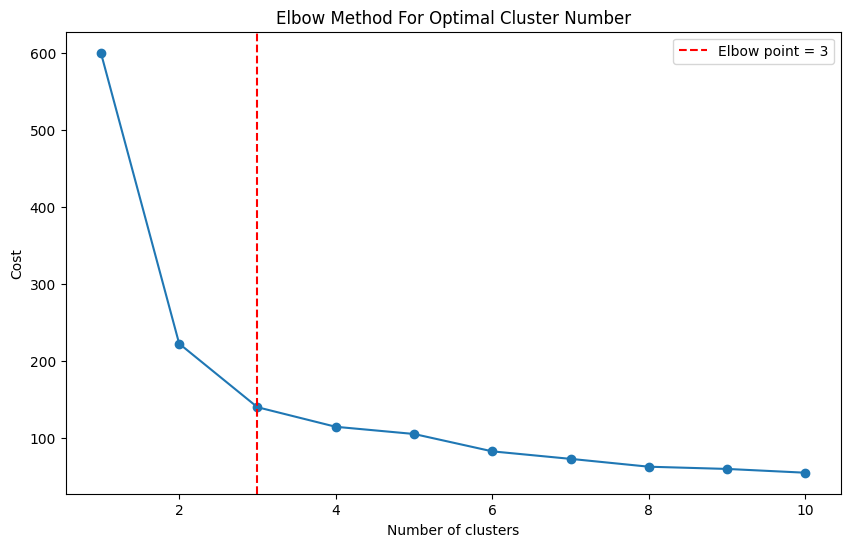

In [15]:
searcher = NClusterSearch(estimator=KMeans(), method='elbow')
searcher.fit(X_scaled)

labels = searcher.labels_
predicted_labels = searcher.predict(X_scaled)
optimal_model = searcher.best_estimator_
optimal_clusters = searcher.optimal_clusters_

searcher.plot()

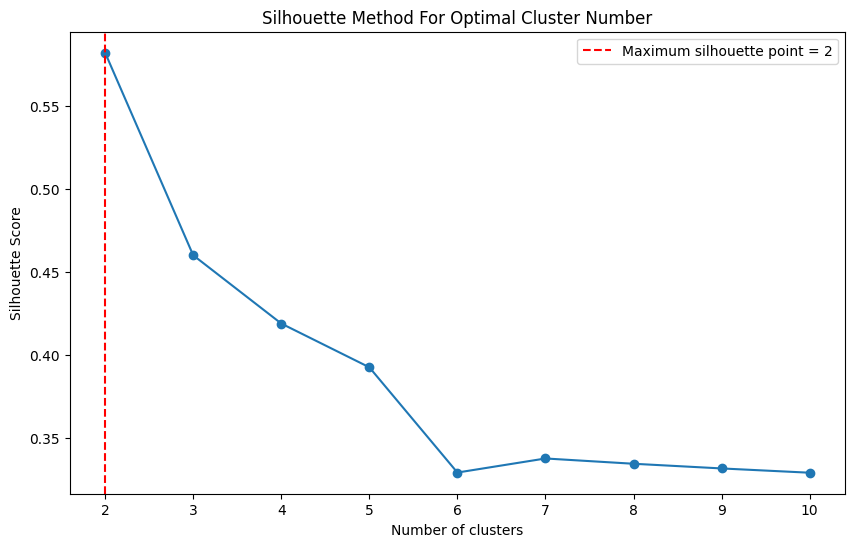

In [16]:
searcher = NClusterSearch(estimator=KMeans(), method='silhouette')
searcher.fit(X_scaled)

labels = searcher.labels_
predicted_labels = searcher.predict(X_scaled)
optimal_model = searcher.best_estimator_
optimal_clusters = searcher.optimal_clusters_

searcher.plot()

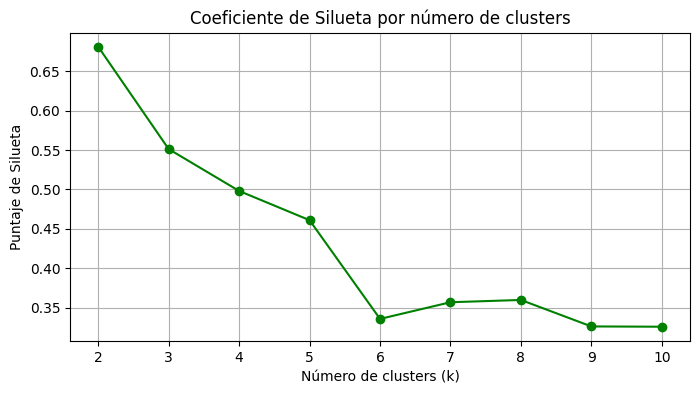

In [17]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(X)
    sil_score = silhouette_score(X, labels)
    silhouette_scores.append(sil_score)

# Graficar
plt.figure(figsize=(8, 4))
plt.plot(K, silhouette_scores, 'go-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Puntaje de Silueta')
plt.title('Coeficiente de Silueta por número de clusters')
plt.xticks(K)
plt.grid(True)
plt.show()

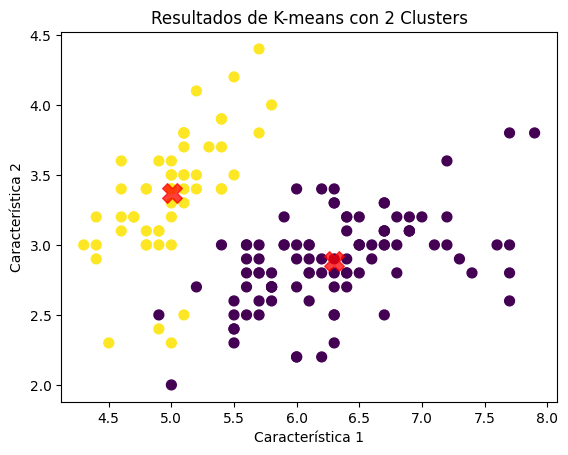

In [18]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Aplicar K-means con 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans.fit(X)

# Obtener las etiquetas de los clusters y los centroides
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Visualizar los clusters y los centroides
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title("Resultados de K-means con 2 Clusters")
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")
plt.show()

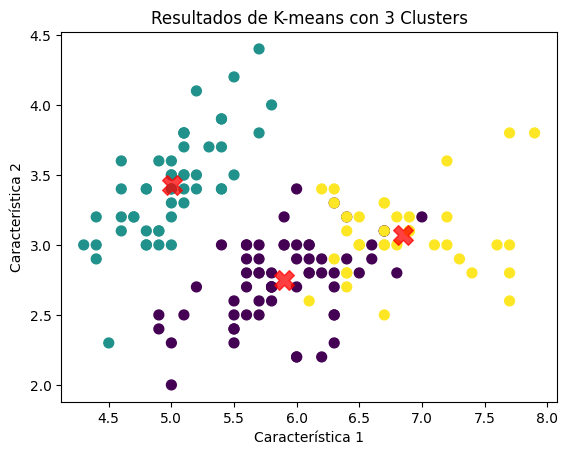

In [19]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Aplicar K-means con 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X)

# Obtener las etiquetas de los clusters y los centroides
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Visualizar los clusters y los centroides
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title("Resultados de K-means con 3 Clusters")
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")
plt.show()

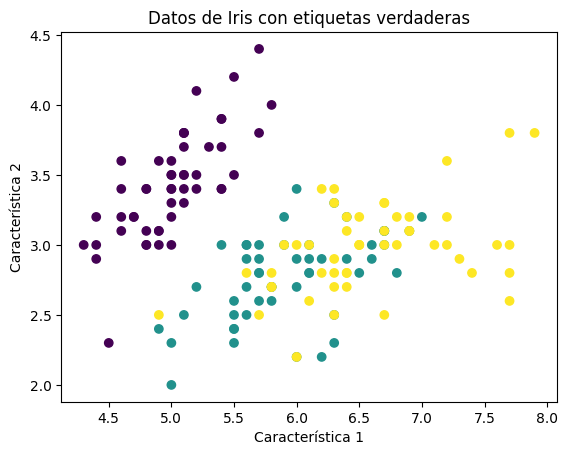

In [20]:
import matplotlib.pyplot as plt

# Graficar los datos de Iris usando la variable 'y' para el color
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title("Datos de Iris con etiquetas verdaderas")
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")
plt.show()

# 🔎 Selección de Parámetros para DBSCAN (Eps y MinPts)

El algoritmo **DBSCAN** requiere dos parámetros clave: **MinPts** (Mínimo de Puntos) y **Eps** (Épsilon, el radio de vecindad). Una selección incorrecta puede llevar a resultados de clustering triviales (un solo clúster) o inútiles (casi todo es ruido).

---

## 1. Estrategia para Seleccionar MinPts (Mínimo de Puntos)

La selección de **MinPts** se basa principalmente en **reglas empíricas** y la **dimensionalidad** de los datos.

### A. Reglas Heurísticas Comunes

1.  **Valor Mínimo:** Se recomienda siempre $\text{MinPts} \ge 3$.
2.  **Dimensionalidad:** Un punto de partida común y robusto, especialmente cuando no se tiene un conocimiento profundo del conjunto de datos, es establecer:

    $$\text{MinPts} = 2 \times \text{Dimensionalidad (Número de Características)}$$

    * **Ejemplo:** Si tu conjunto de datos tiene $D=4$ características, un buen punto de partida es $\text{MinPts} = 8$.
    * **Consideraciones:** Para conjuntos de datos con mucho **ruido** o que son muy grandes, se pueden usar valores más altos (por ejemplo, $\text{MinPts} = 20$).

### B. Impacto de MinPts

* **MinPts bajo:** Genera más clústeres pequeños y etiqueta menos puntos como ruido.
* **MinPts alto:** Genera menos clústeres (solo las regiones más densas) y etiqueta más puntos como ruido.

---

## 2. Estrategia para Seleccionar Eps (Épsilon) usando el Gráfico de Distancia K

Una vez que **MinPts** ha sido fijado (designado como $k$), el valor óptimo de **Eps** se determina visualmente utilizando el **Gráfico de la Distancia $k$-ésima Vecina** (*k-distance plot* o *Elbow Method*).

### A. Concepto de la $k$-Distancia

La $k$-distancia de un punto $p$ es la **distancia hasta su $k$-ésimo vecino más cercano**. Esta distancia es pequeña para los puntos que están en regiones densas (clústeres) y grande para los puntos que se encuentran en regiones de baja densidad (ruido).

### B. Pasos para la Implementación (Python/Colab)

Este proceso utiliza la distancia al vecino $k$-ésimo para identificar el umbral de densidad.

#### Paso 1: Calcular las $k$-Distancias

Se calcula la distancia de cada punto a su $k$-ésimo vecino más cercano (donde $k = \text{MinPts}$).

```python
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# 1. Fijar MinPts (ejemplo, suponiendo que elegimos MinPts = 4)
MinPts = 4

# Asume que 'datos_escalados' son tus datos preprocesados (normalizados o estandarizados)
# Inicializar y calcular distancias a los k-vecinos más cercanos
# n_neighbors = MinPts
neigh = NearestNeighbors(n_neighbors=MinPts)
neigh.fit(datos_escalados)

# Obtener las distancias y los índices de los k vecinos
distances, indices = neigh.kneighbors(datos_escalados)

# Ordenar las distancias del k-ésimo vecino
# distances[:, MinPts-1] toma la columna que corresponde a la distancia al k-ésimo vecino
k_distances = np.sort(distances[:, MinPts-1], axis=0)

#### Paso 2: Graficar y Encontrar el "Codo" (Elbow)

Se grafican las distancias ordenadas. El valor de **Eps** corresponde al **punto de inflexión** ("codo") donde la curva deja de ser relativamente plana y comienza a subir bruscamente.

```python
# 2. Generar el gráfico de k-distancia
plt.figure(figsize=(10, 6))
plt.plot(k_distances)
plt.title(f'Gráfico de la {MinPts}-Distancia para encontrar Eps')
plt.xlabel('Puntos de Datos (Ordenados por Distancia)')
plt.ylabel(f'{MinPts}-Distancia (Eps)')
plt.grid(True)
plt.show()

**3. Identificación del Codo:**

La identificación se realiza buscando visualmente el punto en el eje Y (distancia) donde la curva experimenta el cambio más drástico de pendiente. Este punto es el **"codo"** o punto de inflexión.

* **¿Por qué el codo?** Los puntos a la **izquierda** del codo tienen $k$-distancias pequeñas y uniformes, lo que indica que están densamente agrupados. Los puntos a la **derecha** del codo tienen $k$-distancias grandes, lo que indica que son, muy probablemente, **ruido** (*outliers*). El codo representa el límite de distancia en el que la región densa se descompone en ruido.
* **Selección:** El valor de **Eps** se elige como la **altura** (valor en el eje Y) de este punto de inflexión.

```python
# Ejemplo de selección visual del valor óptimo de Eps
# Asume que, tras inspeccionar el gráfico, el codo se encuentra en una altura de 0.5:
Eps_optimo = 0.5

C. Impacto de Eps
La elección de Eps es crítica, ya que define la sensibilidad del algoritmo a la densidad:

Eps muy pequeño: Clasificará a la mayoría de los puntos como ruido (etiqueta -1), ya que las vecindades serán demasiado estrictas para cumplir con el umbral de MinPts.

Eps muy grande: Todos los puntos se considerarán vecinos, y el algoritmo tenderá a crear un único clúster grande, perdiendo la capacidad de separar agrupaciones.

El valor del Codo: Ofrece el mejor equilibrio, siendo el límite máximo de distancia para que un punto sea considerado parte de una región de densidad significativa.

3. Resumen y Aplicación Final
Una vez que se han seleccionado los dos parámetros:

MinPts (k): Elegido basándose en la dimensionalidad de los datos (e.g., 2×Dimensiones) o en un valor mínimo (≥3).

Eps (ϵ): Determinado visualmente en el "codo" del Gráfico de la Distancia K.

Se procede a aplicar el algoritmo DBSCAN:

Python

from sklearn.cluster import DBSCAN

# Asumiendo los valores óptimos encontrados:
MinPts_final = 4
Eps_final = 0.5

# Aplicar DBSCAN (min_samples es el alias para MinPts en scikit-learn)
db = DBSCAN(eps=Eps_final, min_samples=MinPts_final).fit(datos_escalados)

# Obtener las etiquetas de los clústeres
labels = db.labels_

# Calcular métricas básicas
# El ruido se etiqueta con -1
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Clústeres encontrados: {n_clusters}")
print(f"Puntos clasificados como ruido: {n_noise}")

In [23]:
!pip install gower


In [24]:
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler

df = sns.load_dataset('titanic')
cols = ['pclass', 'sex', 'age', 'fare', 'embarked', 'alone']
data = df[cols].dropna()

# One-hot encoding
encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(data[['sex', 'embarked', 'alone']])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['sex', 'embarked', 'alone']))

# unir con numéricas
numeric_df = data[['pclass', 'age', 'fare']].reset_index(drop=True)
X = pd.concat([numeric_df, encoded_df], axis=1)

# Escalar todo
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [35]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [25]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=1.5, min_samples=10)
labels = dbscan.fit_predict(X_scaled)

data['cluster'] = labels
data['cluster'].value_counts()


,count
cluster,
4,257
3,113
0,108
2,68
-1,52
1,36
5,36
6,28
7,14


In [33]:
import gower
import numpy as np
from sklearn.cluster import DBSCAN

# eliminar nulos
data = df[cols].dropna()

# Calcular matriz de distancias Gower
gower_dist = gower.gower_matrix(data)

# Aplicar DBSCAN usando la métrica precomputada
dbscan = DBSCAN(eps=0.17, min_samples=10, metric='precomputed')
labels = dbscan.fit_predict(gower_dist)

data['cluster'] = labels
data['cluster'].value_counts()


,count
cluster,
0,709
-1,3


In [34]:
df_filtered = df.loc[data.index]
df_filtered['cluster'] = labels
df_filtered.groupby('cluster')['survived'].mean()


,survived
cluster,
-1,0.333333
0,0.404795



# PCA (Análisis de Componentes Principales) — guía detallada (no supervisado)

## 1) ¿Qué es PCA y por qué se usa?
El **Análisis de Componentes Principales (PCA)** es una técnica **no supervisada** de **reducción de dimensionalidad** que transforma un conjunto de variables numéricas posiblemente correlacionadas en **componentes** lineales (no correlacionados) que:
- maximizan la **varianza** retenida,
- facilitan **visualización** 2D/3D,
- ayudan a **filtrar ruido** y **acelerar** modelos posteriores.

Ejemplos de uso: EDA, preprocesamiento previo a *clustering*, compresión, *denoising* y visualización.

---

## 2) Preparación de datos
1. Asegurar variables **numéricas**.
2. **Centrar** cada variable restando su media (obligatorio).
3. **Estandarizar** si hay escalas/unidades diferentes (recomendado).  
   - PCA sobre datos estandarizados equivale a PCA sobre la **matriz de correlaciones**.

Si \(X \in \mathbb{R}^{n \times p}\) es la matriz de datos, denotemos por \(X_c\) a \(X\) centrada (y opcionalmente estandarizada).

---

## 3) Formulación matemática básica
La **matriz de covarianzas** de \(X_c\) es
$$
S \;=\; \frac{1}{n-1}\, X_c^\top X_c \;\in\; \mathbb{R}^{p \times p}.
$$

El **primer componente principal** es la dirección \(w_1 \in \mathbb{R}^p\) que **maximiza la varianza proyectada** bajo norma unitaria:
$$
\max_{\lVert w \rVert = 1} \ \mathrm{Var}(X_c w)
\;=\;
\max_{\lVert w \rVert = 1} \ w^\top S w.
$$

Con multiplicadores de Lagrange se obtiene el **problema de autovalores**:
$$
S w \;=\; \lambda w.
$$

Los **componentes** son los **autovectores** \(w_1, w_2, \dots, w_p\) (ortogonales), ordenados por autovalores \(\lambda_1 \ge \lambda_2 \ge \dots \ge \lambda_p \ge 0\).

### Proyección (scores) y reconstrucción
Sea \(W_k = [w_1, \dots, w_k] \in \mathbb{R}^{p \times k}\). Entonces:
- **Scores** (coordenadas en el espacio reducido):
$$
Z \;=\; X_c\, W_k \;\in\; \mathbb{R}^{n \times k}.
$$
- **Reconstrucción** con \(k\) componentes:
$$
\hat{X}_c \;=\; Z\, W_k^\top \;=\; X_c\, W_k W_k^\top.
$$

### Error de reconstrucción y Eckart–Young
El **error medio de reconstrucción** mínimo al usar \(k\) componentes cumple
$$
\frac{1}{n}\,\lVert X_c - \hat{X}_c \rVert_F^2 \;=\; \sum_{i=k+1}^{\min(n,p)} \lambda_i.
$$

### Varianza explicada
La **varianza explicada** por el componente \(i\)-ésimo es \(\lambda_i\). El **porcentaje de varianza explicada** (PVE) es
$$
\mathrm{PVE}_i \;=\; \frac{\lambda_i}{\sum_{j=1}^{p} \lambda_j},
\qquad
\mathrm{PVE}_{1:k} \;=\; \frac{\sum_{i=1}^{k} \lambda_i}{\sum_{j=1}^{p} \lambda_j}.
$$

---

## 4) Relación con SVD (recomendada en la práctica)
La **SVD** de la matriz centrada \(X_c\) es
$$
X_c \;=\; U\, \Sigma\, V^\top,
$$
donde \(U \in \mathbb{R}^{n \times r}\), \(V \in \mathbb{R}^{p \times r}\), \(\Sigma=\mathrm{diag}(\sigma_1,\dots,\sigma_r)\) y \(r=\mathrm{rango}(X_c)\). Entonces:
- **Loadings** (pesos de las variables en cada componente): columnas de \(V\).
- **Scores**: \(Z = U \Sigma\).
- **Autovalores** de \(S\): \(\lambda_i = \sigma_i^2/(n-1)\).

Usar SVD evita formar \(S\) explícitamente y es más estable cuando \(p\) es grande.

---

## 5) Estandarización y matriz de correlaciones
Si estandarizamos cada columna de \(X\) obtenemos \(Z_s\) con media cero y desviación estándar uno. El PCA sobre \(Z_s\) equivale a PCA sobre la matriz de **correlaciones**:
$$
R \;=\; \frac{1}{n-1}\, Z_s^\top Z_s.
$$

---

## 6) ¿Cómo elegir el número de componentes \(k\)?
1. **Gráfico de codo (scree plot)**: buscar el punto donde la caída de autovalores se aplana.  
2. **Umbral de varianza acumulada**: elegir el menor \(k\) tal que
$$
\mathrm{PVE}_{1:k} \;\ge\; \tau
$$
con \(\tau\) típico en \([0.9, 0.95]\).
3. **Análisis paralelo (Horn)**: comparar autovalores con datos simulados aleatorios.
4. **Validación en la tarea**: si PCA es parte de un pipeline supervisado posterior, elegir \(k\) que optimiza el desempeño en validación cruzada, evitando fuga de datos.

---

## 7) Blanqueamiento (*whitening*, opcional)
Para producir características **no correlacionadas** con **varianza unitaria** se puede transformar
$$
Z_{\text{white}} \;=\; X_c\, V\, \Lambda^{-1/2},
$$
donde \(\Lambda = \mathrm{diag}(\lambda_1,\dots,\lambda_k)\) y \(V\) contiene los \(k\) autovectores principales.

---

## 8) Algoritmo práctico (resumen)
1. Imputar faltantes si existen y separar sets de train/valid/test si habrá modelado posterior.
2. **Centrar** siempre; **estandarizar** si hay escalas distintas.
3. Calcular **SVD** de \(X_c\): \(X_c = U \Sigma V^\top\).
4. Elegir \(k\) (codo, PVE, análisis paralelo o validación).
5. Obtener **scores** \(Z = U_k \Sigma_k\) y **loadings** \(W_k = V_k\).
6. Usar \(Z\) para visualización, *clustering* u otros modelos; o reconstruir \(\hat{X}_c = Z W_k^\top\).

---

## 9) Buenas prácticas y advertencias
- **Fuga de datos**: si PCA alimenta un modelo supervisado, ajústalo **dentro de un pipeline** y valida con **CV**.
- **Outliers**: pueden dominar la varianza. Considerar **Robust PCA** o tratamientos previos.
- **Datos categóricos**: PCA requiere variables numéricas; para categóricas evaluar **MCA** u otras técnicas.
- **Linealidad**: PCA captura estructura lineal; si esperas separaciones no lineales, evaluar **Kernel PCA**, **t-SNE** o **UMAP** para visualización.
- **Árboles**: muchos modelos basados en árboles no requieren PCA.

---

## 10) Extensiones rápidas
- **Kernel PCA**: aplica PCA en un espacio de características implícito mediante un *kernel* (RBF, polinomial, etc.).
- **Sparse PCA**: fuerza esparsidad en los *loadings* para mayor interpretabilidad.
- **Incremental PCA / Randomized SVD**: para datos muy grandes.

---

## 11) Ejemplo en scikit-learn (pipeline)
```python
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Retiene el 95% de la varianza y asegura cálculo estable
pca_pipe = Pipeline([
    ("scaler", StandardScaler(with_mean=True, with_std=True)),  # Estandariza: correlaciones
    ("pca", PCA(n_components=0.95, svd_solver="full"))          # Selecciona k automáticamente
])

Z = pca_pipe.fit_transform(X)  # X: (n, p)
pve = pca_pipe.named_steps["pca"].explained_variance_ratio_     # PVE por componente
loadings = pca_pipe.named_steps["pca"].components_.T            # (p, k)
# Reconstrucción aproximada en el espacio original:
X_hat = pca_pipe.named_steps["pca"].inverse_transform(Z)
X_hat = pca_pipe.named_steps["scaler"].inverse_transform(X_hat)
```

---

## 12) Resumen
PCA encuentra **direcciones ortogonales de máxima varianza** y proyecta los datos sobre ellas, produciendo representaciones compactas con **mínimo error de reconstrucción** para un \(k\) dado. Es una herramienta esencial de **EDA**, **compresión** y **preprocesamiento** para métodos no supervisados.
